# ANALYZING AND MITIGATING CUSTOMER CHURN AT MODEL FITNESS: A DATA-DRIVEN STRATEGY

# Introduction 

# Project Description

> - The gym chain Model Fitness is developing a customer interaction strategy based on analytical data. One of the most common problems gyms and other services face is customer churn. How do to know if a customer is no longer with us? Churn can be calculated based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.

> - Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, we can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: our follower might have gotten bored and left us.

> - For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back. In order to fight churn, Model Fitness has digitized a number of its customer profiles. Our task is to analyze them and come up with a customer retention strategy.

- Understanding Churn: Begin with an in-depth analysis of customer behavior data to predict the probability of churn within the next month. This involves developing a predictive model that identifies key indicators of customer disengagement and potential churn.
- Customer Profiling: Segment the gym's clientele into distinct groups based on their usage patterns and demographic information. This step aims to paint detailed portraits of typical users, highlighting the characteristics of those most likely to leave.
- Strategic Recommendations: Based on the analysis, suggest targeted actions to reduce churn rates effectively. This includes identifying the most at-risk customer groups and proposing tailored engagement strategies to enhance their gym experience and retention.

> datasets/gym_churn_us.csv:
> - Churn — the fact of churn for the month in question
> - gender
> - Near_Location — whether the user lives or works in the neighborhood where the gym is located
> - Partner — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
> - Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
> - Phone' — whether the user provided their phone number
> - Age
> - Lifetime — the time (in months) since the customer first came to the gym
> - Contract_period — 1 month, 3 months, 6 months, or 1 year
> - Month_to_end_contract — the months remaining until the contract expires
> - Group_visits — whether the user takes part in group sessions
> - Avg_class_frequency_total — average frequency of visits per week over the customer's lifetime
> - Avg_class_frequency_current_month — average frequency of visits per week over the current month
> - Avg_additional_charges_total — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

## Goals:

- Develop an accurate model to predict the likelihood of each customer discontinuing their gym membership within the upcoming month.
- Create distinct profiles for different customer groups by analyzing their activity patterns, preferences, and demographics to understand better who is most at risk of churn.
- Leverage the insights gained from the data to recommend specific, actionable strategies aimed at reducing churn rates and improving overall customer engagement and satisfaction

 # Table of Contents  
1. [Stage 1: Data Preprocessing](#1)
    1. ['gym_churn' file](#2)
1. [Stage 2: Exploratory Data Analysis](#3) 
    1. [Grouping the data into two categories (By Churn)](#4)
    1. [Bar histograms and Feature distributions](#5)
       1. [Churn customer distribution](#6)
       1. [Stayed customer distribution](#7)
       1. [Comparison between Churn & Stayed Customer Distribution](#8)
    1. [Correlation matrix](#9)
    1. [Model prediction for user churn](#10)
    1. [User Clustering](#11)
       1. [Dendrogram of User Clusters](#12)
       1. [K-means and Mean_features](#13)
       1. [Distributions of features for the clusters](#14)
    1. [Churn Rate](#15)
1. [Stage 3: Overall Conclusion](#16)

<a id="1"></a> 
# Stage 1 : Data Preprocessing

In [1]:
from scipy import stats as st #for probability and calculation of statistics
import pandas as pd #for dataframe manipulation
import numpy as np #for advanced mathematic operation
import nltk #for string/text manipulation

import matplotlib.pyplot as plt #for plotting and visualize graph
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

<a id="2"></a> 
## 'gym_churn' file

In [2]:
# Loading note from the remote Jupyter Hub Notebook (visits_df)
try:
    gym_df = pd.read_csv('/datasets/gym_churn_us.csv')
# If dataset fails to be loaded from the remote Jupyter Hub Notebook
# try loading dataset from my local path
except:
    # Try loading the file locally
    try:
        gym_df = pd.read_csv('/datasets/gym_churn_us.csv')
    # Run if dataset loading fails
    except Exception as e:
        print(f"Error handling dataset loading: {e}")

In [3]:
gym_df.info()
gym_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [4]:
gym_df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


> Based on above, it can be deduced that:
> - Gender: Identifies the customer's gender (0 for female, 1 for male).
> - Near_Location: Shows whether the customer lives or works close to the gym (0 for no, 1 for yes).
> - Partner: Specifies if the customer is an employee of a partner company (0 for no, 1 for yes).
> - Promo_friends: Denotes whether the customer joined the gym through a referral from a friend (0 for no, 1 for yes).
> - Phone: Indicates whether the customer has provided a phone number (0 for no, 1 for yes).
> - Contract_period: The length of the customer's gym contract, measured in months.
> - Group_visits: Shows if the customer participates in group fitness sessions (0 for no, 1 for yes).
> - Age: The age of the customer.
> - Avg_additional_charges_total: The total amount of extra charges the customer has incurred.
> - Month_to_end_contract: The number of months remaining until the customer's contract expires.
> - Lifetime: The total number of months the customer has been with the gym.
> - Avg_class_frequency_total: The average number of visits per week over the customer's membership period.
> - Avg_class_frequency_current_month: The average number of visits per week during the current month.
> - Churn: Indicates whether the customer has left the gym (0 for active, 1 for churned).

In [5]:
# Change column names to lowercase in 'gym_df'
gym_df.columns = gym_df.columns.str.lower()

In [6]:
# Check missing values in 'gym_df'
gym_missing_values = gym_df.isna().sum()
gym_missing_values

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

- There are no missing values from the dataframe

In [7]:
duplicates = gym_df.duplicated()
print(duplicates.count())
duplicate_count = duplicates.sum()
print(f"Total number of duplicate rows: {duplicate_count}")

4000
Total number of duplicate rows: 0


- There is no duplicated values.

<a id="3"></a> 
# Stage 2: Exploratory Data Analysis

- Below are the questions that need to be answered throughout this analysis:

> - To effectively address customer retention at Model Fitness, as a data analyst, the initial step involves conducting exploratory data analysis (EDA) on the provided customer profiles. This involves several key actions:

> - Identifying missing values and examining the central tendencies and variabilities of the data using the describe() method. This analysis provides insights into the dataset's distribution and allows for a better understanding of the data's characteristics.

> - Grouping the data into two categories: churned customers and retained customers. By employing the groupby() method, the mean feature values for each group can be examined. This comparison enables a deeper analysis of the distinguishing features between customers who have left and those who have stayed.

> - Utilizing bar histograms and feature distributions to visualize the data for both churned and retained customers. This visualization aids in identifying potential patterns or trends that may be relevant to churn and retention. By visually comparing the distributions, potential factors influencing churn can be explored.

> - Constructing a correlation matrix to assess the relationships between different variables in the dataset. This matrix provides insights into the strength and direction of the relationships, allowing for the identification of key factors that may be linked to customer churn.

<a id="4"></a> 
## Grouping the data into two categories (By Churn)

In [8]:
# Grouping the data by the 'Churn' column
grouped_data = gym_df.groupby('churn')

# Calculating the mean feature values for each group
mean_values = grouped_data.mean()

# Displaying the mean feature values for each group
display(mean_values)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


> The data presents the mean values of various features categorized by the Churn column, indicating whether a customer has churned (1) or not (0). Here are some key insights:

> - Gender: The gender distribution is similar for both churned and retained customers, with approximately 51% for both male and female in each group.

> - Near_Location: A higher percentage of retained customers (87.3%) live or work near the gym compared to churned customers (76.8%), suggesting that proximity may influence retention.

> - Partner: A greater proportion of retained customers (53.4%) are employees of partner companies, compared to churned customers (35.5%), indicating that partnerships may contribute to higher retention rates.

> - Promo_friends: More retained customers (35.4%) were referred by a friend compared to churned customers (18.4%), implying that word-of-mouth referrals may aid in retention.

> - Phone: The proportion of customers providing their phone number is similar for both groups (around 90%), suggesting that phone number availability has minimal impact on churn.

> - Contract_period: Retained customers have longer average contract periods (5.7 months) compared to churned customers (1.7 months), indicating that longer contracts may correlate with higher retention.

> - Group_visits: A higher proportion of retained customers (46.4%) participate in group sessions compared to churned customers (26.9%), which may suggest that group activities foster a sense of community and enhance retention.

> - Age: Retained customers are slightly older on average (around 30 years) compared to churned customers (around 27 years).

> - Avg_additional_charges_total: Retained customers incur higher average additional charges, suggesting greater engagement with additional gym services.

> - Month_to_end_contract: Retained customers have more months remaining until the end of their contract compared to churned customers.

> - Lifetime: Retained customers have been with the gym longer on average compared to churned customers.

> - Avg_class_frequency_total: Retained customers attend classes more frequently on average compared to churned customers.

> - Avg_class_frequency_current_month: Retained customers also have higher average class attendance in the current month compared to churned customers.

<a id="5"></a> 
## Bar histograms and Feature distributions

- Split the churn and stayed customer and check the pattern based on bar histogram.

<a id="6"></a> 
### Churn customer distribution

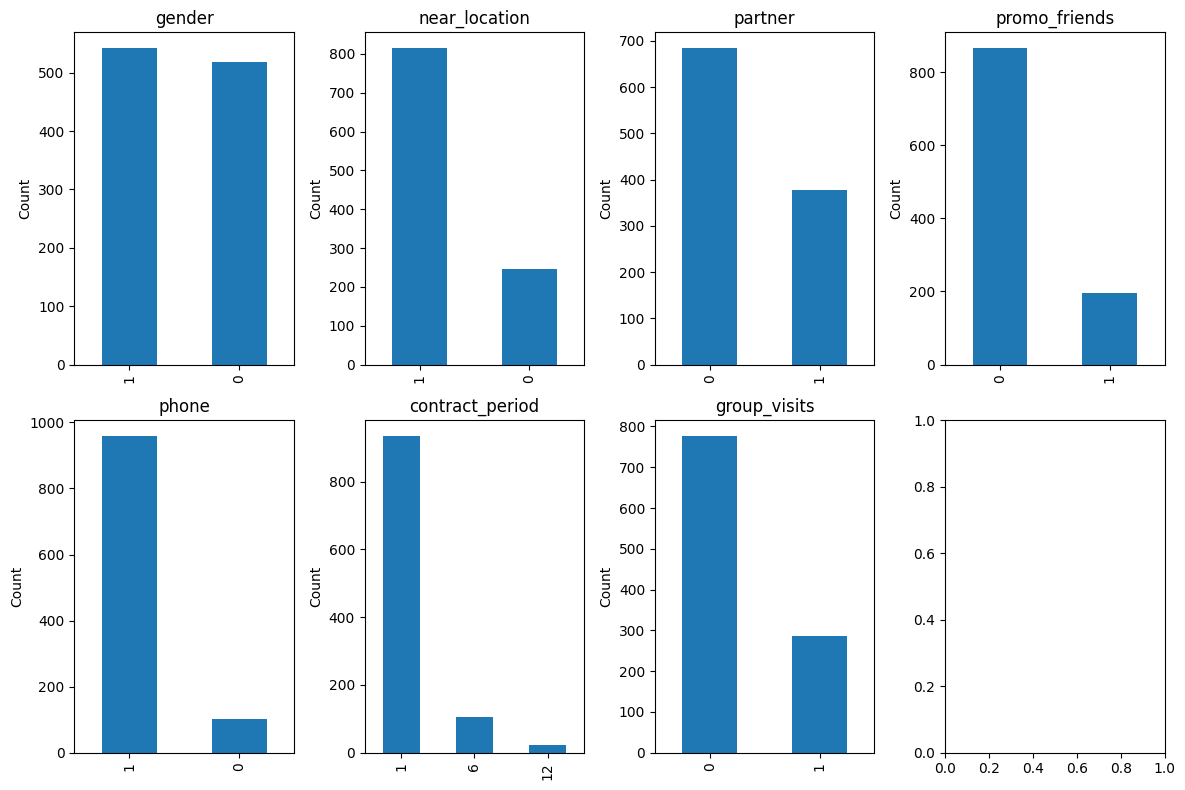

In [9]:
# Filter the data for churned customers
churned_data = gym_df[gym_df['churn'] == 1]

# Features of interest
features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits']

# Number of rows and columns for subplots
rows = 2
cols = 4

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Flatten axes into a 1D array
axes = axes.flatten()

# Plot bar histograms for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    churned_data[feature].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(feature)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.grid(False)

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

> Here are the key findings based on the bar histograms plotted for churned customers:

> - Gender: The distribution of churned customers is almost equal between males and females.

> - Near_Location: A larger number of churned customers are those who live or work near the gym compared to those who don't.

> - Partner: The majority of churned customers are not employed by partner companies.

> - Promo_friends: Customers who did not join the gym through a 'promo_friends' offer are more common among those who churned.

> - Phone: Most churned customers had provided their phone number.

> - Contract_period: Churned customers typically had short-term contracts, with a notable peak at 1-month contracts.

> - Group_visits: Participation in group visits was less common among churned customers compared to retained customers.

- These insights indicate that proximity to the gym, lack of partnership affiliation, absence of promotional referrals, shorter contract periods, and lower engagement in group activities may contribute to customer churn. Investigating these factors further can help develop targeted strategies to enhance customer retention.

<a id="7"></a> 
### Stayed customer distribution

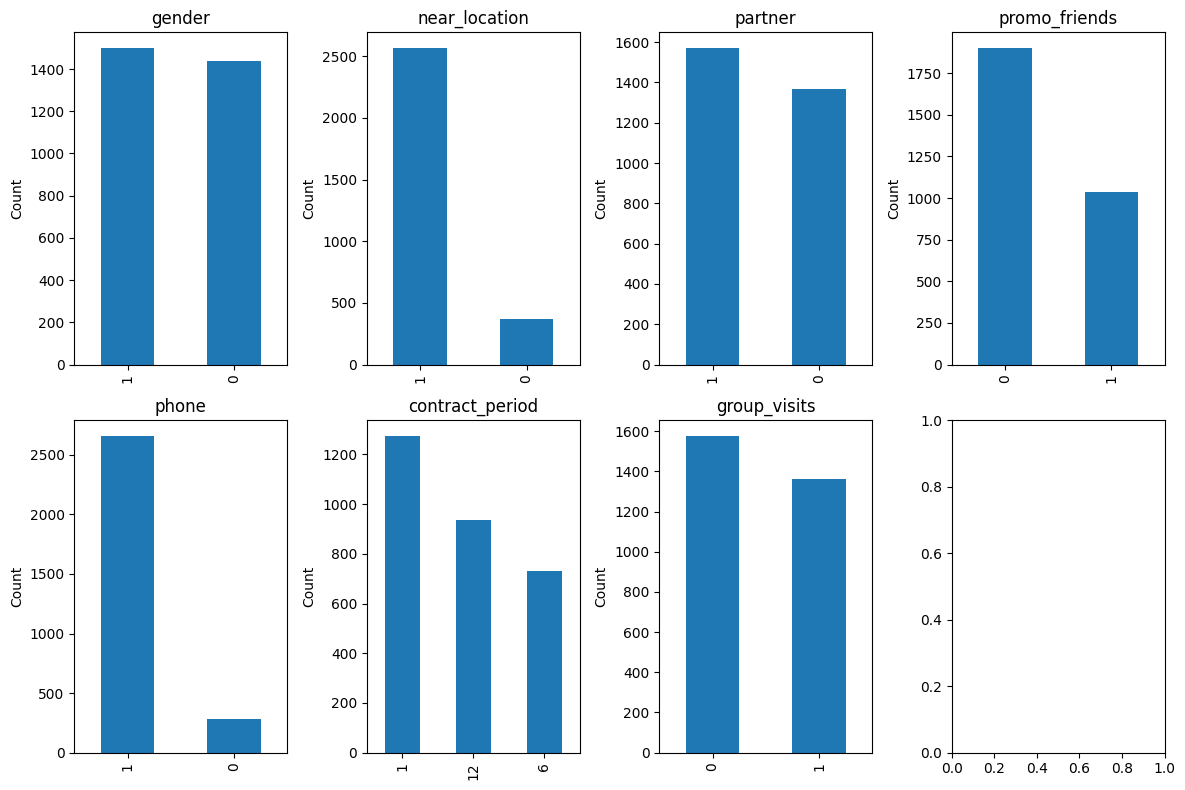

In [10]:
# Filter the data for customers who stayed (not churned)
stayed_data = gym_df[gym_df['churn'] == 0]

# Features of interest
features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits']

# Number of rows and columns for subplots
rows = 2
cols = 4

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Flatten axes into a 1D array
axes = axes.flatten()

# Plot bar histograms for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    stayed_data[feature].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(feature)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.grid(False)

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

> Here are the key findings based on the bar histograms for customers who remained with the gym:

> - Gender: The number of male and female customers who stayed is nearly equal.

> - Near_Location: Most customers who continued their membership live or work close to the gym.

> - Partner: A large percentage of customers who stayed are employees of partner companies.

> - Promo_friends: Many of the customers who remained with the gym were referred through a 'promo_friends' offer.

> - Phone: Nearly all retained customers provided their phone number.

> - Contract_period: Retained customers have varied contract lengths, with a notable number having 1-month and 12-month contracts.

> - Group_visits: A significant number of customers who stayed actively participated in group sessions.

- These observations indicate that factors like gym proximity, partnership affiliations, referral through promotions, phone number provision, contract duration, and involvement in group activities are associated with customer retention. Understanding these factors can help formulate strategies to retain customers and enhance their overall experience at the gym.

<a id="8"></a> 
### Comparison between Churn & Stayed Customer Distribution

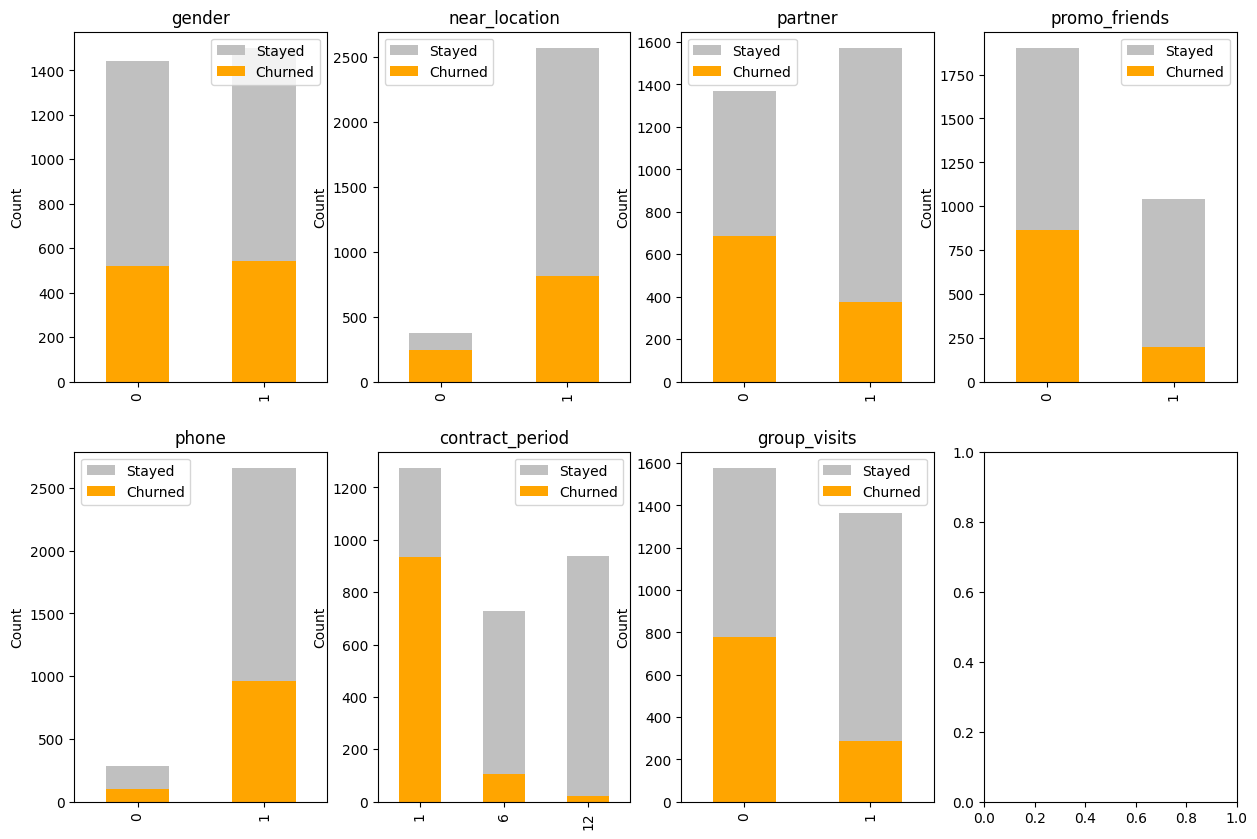

In [11]:
# Filter the data for churned and stayed customers
churned_data = gym_df[gym_df['churn'] == 1]
stayed_data = gym_df[gym_df['churn'] == 0]

# Features of interest (categorical variables)
features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits']

# Number of rows and columns for subplots
rows = 2
cols = 4

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten axes into a 1D array
axes = axes.flatten()

# Plot feature distributions for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    stayed_data[feature].value_counts().sort_index().plot(kind='bar', ax=ax, color='silver', label='Stayed')
    churned_data[feature].value_counts().sort_index().plot(kind='bar', ax=ax, color='orange', label='Churned')
    ax.set_title(feature)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.legend()

> Based on analysis of categorical features:

> - Gender: There is no significant difference in churn rates between male and female customers.
> - Near Location: Customers living or working close to the gym are more likely to maintain their memberships.
> - Partner: Having a partner affiliation significantly increases the likelihood of customers staying with the gym.
> - Promo Friends: Referrals by friends positively impact customer retention, with referred customers showing higher loyalty.
> - Phone: Whether a customer provided their phone number does not appear to affect churn rates.
> - Group Visits: Participation in group activities correlates with higher retention rates among customers.

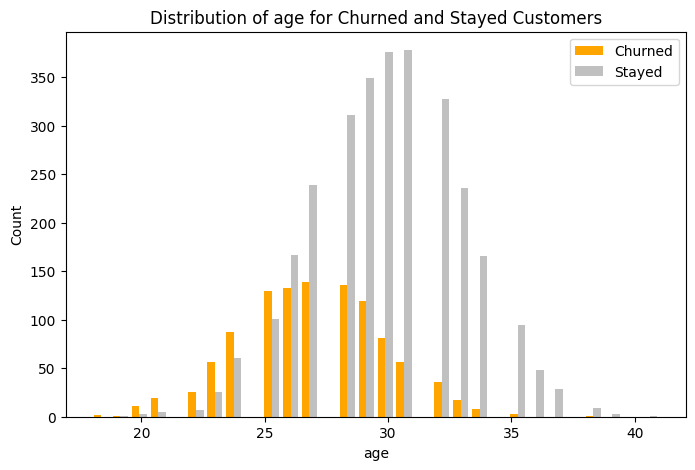

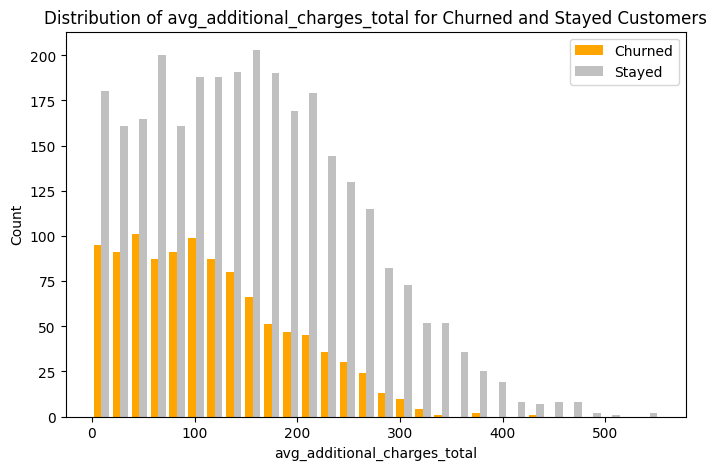

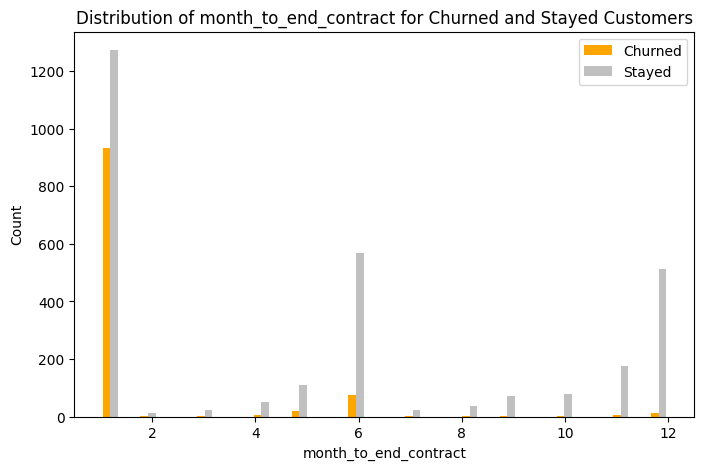

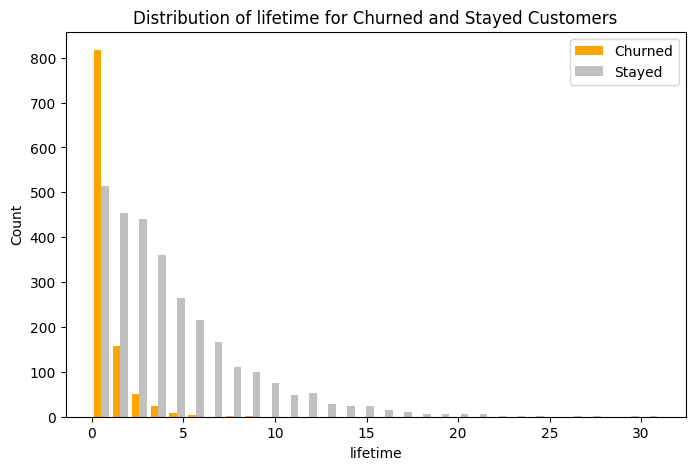

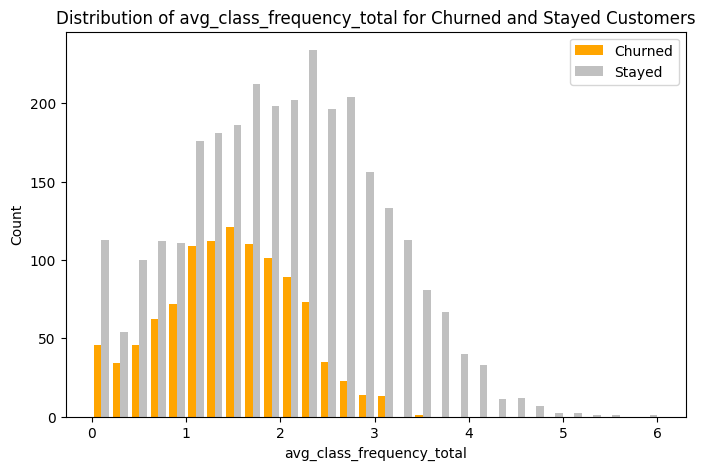

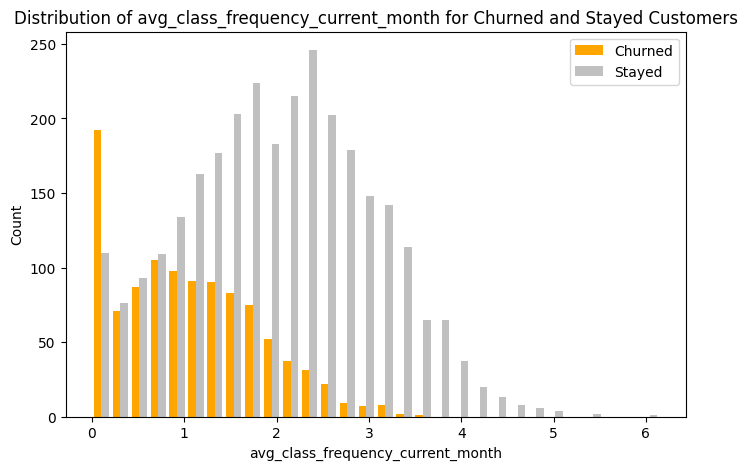

In [12]:
# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

# Features of interest (continuous variables)
continuous_features = ['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
                       'avg_class_frequency_total', 'avg_class_frequency_current_month']

# Plot distributions for continuous features
for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    plt.hist([churned_data[feature], stayed_data[feature]], bins=30, color=['orange', 'silver'], label=['Churned', 'Stayed'])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature} for Churned and Stayed Customers')
    plt.legend()
    plt.show()

> Based on analysis of continous features:

> - Age: There is no distinct relationship between age and the likelihood of customer churn.
> - Average Additional Charges: Customers who spend more on extra services tend to remain with the gym.
> - Month-to-End Contract: A longer remaining contract period is associated with higher customer retention.
> - Lifetime: Customers who have been members for a longer period are more likely to continue their membership.
> - Average Class Frequency: Higher overall class attendance correlates with a greater likelihood of staying.
> - Average Class Frequency (Current Month): Customers who frequently attend classes in the current month are more likely to remain active members.

> These insights offer valuable direction for creating targeted strategies to enhance customer retention. 
> - The gym should focus on maximizing the benefits for nearby customers, utilizing referral programs, and increasing the appeal of additional services to boost customer loyalty. 
> - Additionally, promoting group visit participation and encouraging regular class attendance can contribute to higher retention rates.

> To effectively address these findings, the gym should customize their marketing and customer engagement strategies. 
> - Understanding the specific factors that affect customer churn will enable the gym to implement successful retention initiatives and actively engage customers, thereby improving their overall experience and satisfaction.

<a id="9"></a> 
## Correlation matrix

- Created a new DataFrame called data_dropped by removing the columns avg_class_frequency_total and month_to_end_contract from the original dataset. This step was taken to address feature collinearity, reduce redundancy, and enhance the independence of features for better model building.

- Additionally, calculated the correlation matrix using the Spearman method. While the default method in Pandas DataFrame's corr function is Pearson correlation, chose Spearman correlation for this analysis. 
- The Spearman correlation assesses the monotonic relationship between variables, making it suitable for analyzing non-linear relationships and ordinal data. By applying Spearman correlation, we can better understand the strength and direction of associations among the remaining features in the data_dropped DataFrame.

- These adjustments and the use of Spearman correlation aim to provide a clearer understanding of the relationships between features, uncover potential dependencies, and improve the reliability of findings.

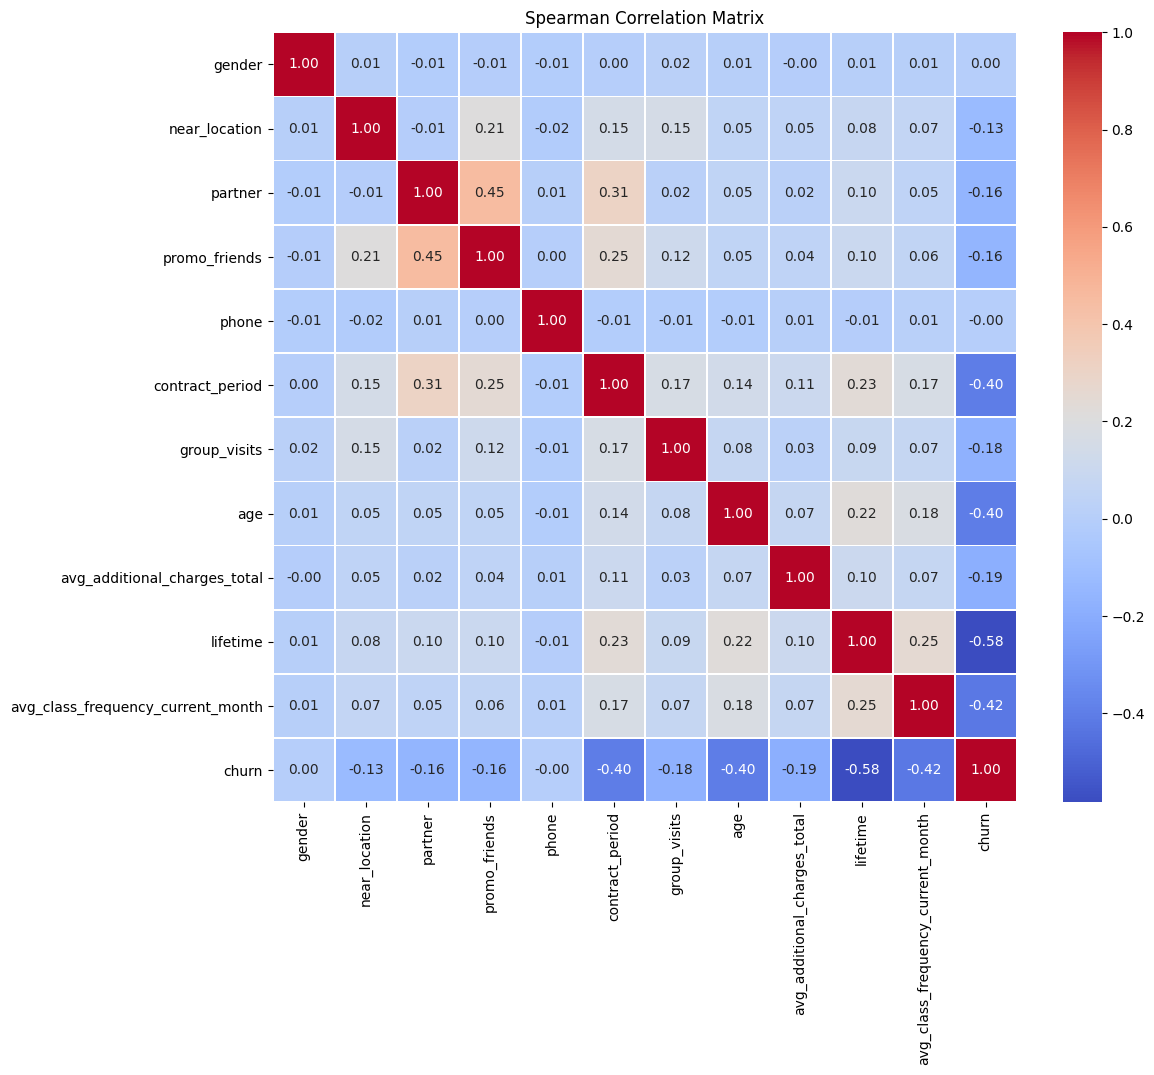

In [13]:
# Create a new DataFrame with dropped columns
gym_dropped = gym_df.drop(['avg_class_frequency_total', 'month_to_end_contract'], axis=1)

# Compute the correlation matrix using Spearman method
corr_matrix_spearman = gym_dropped.corr(method='spearman')

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_spearman, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()

> The correlation matrix reveals several significant insights:

> - Churn shows negative correlation with contract_period, lifetime, and avg_class_frequency_current_month. This implies that customers with longer contracts, higher lifetime values, and more frequent class attendance are less likely to churn.

> - Churn exhibits positive correlation with partner, promo_friends, and group_visits. This suggests that customers with partners, referred by friends, or participating in group visits are less likely to churn.

> - Features like near_location and phone have weak correlations with churn, indicating a minimal impact on customer churn.

> - Moderate correlations exist between certain features, such as partner and promo_friends, suggesting a potential relationship between these variables.

- Based on these findings, the company can focus on strategies to increase contract lengths, enhance customer engagement and attendance, and promote partner involvement and referrals. Additionally, fostering a sense of community through group activities can help reduce churn rates. These insights can guide the development of targeted marketing campaigns and personalized retention strategies to retain customers and minimize churn.

<a id="10"></a> 
## Model prediction for user churn

> In this section, it will be focus on predicting user churn using data with dropped columns to address collinearity. The key steps of the code are:

> - Data Splitting: Divide the data into features (X) and the target variable (y), excluding the dropped columns and setting the target variable to the churn column.

> - Train-Test Split: The data is split into training and validation sets using train_test_split(). The training set is used to train the models, and the validation set is used to evaluate their performance.

> - Feature Scaling: Features are scaled using StandardScaler to ensure they are on a similar scale and prevent certain features from dominating during model training.

> - Model Selection and Evaluation: We define a list of models, including LogisticRegression and RandomForestClassifier. Each model is trained on the scaled training features and evaluated on the scaled validation features. Metrics such as accuracy, precision, recall, F1 score, and ROC AUC score are calculated and printed for each model.

- The objective is to compare the performance of different models in predicting user churn. By assessing these metrics, we can determine the most suitable model for classifying customers likely to churn, aiding in the development of effective retention strategies.

In [14]:
# Split the data into features (X) and the target variable (y)
features = gym_dropped.drop('churn', axis=1)
target = gym_dropped['churn']

# Split the data into train and validation sets using train_test_split()
feature_train, feature_val, target_train, target_val = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_features_train = scaler.fit_transform(feature_train)
scaled_features_val = scaler.transform(feature_val)

# Declare the list of models
models = [LogisticRegression(max_iter=1000), RandomForestClassifier()]

# Evaluate each model on the validation set
for model in models:
    # Train the model on the training set
    model.fit(scaled_features_train, target_train)

    # Make predictions on the validation set
    predictions = model.predict(scaled_features_val)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(target_val, predictions)
    precision = precision_score(target_val, predictions)
    recall = recall_score(target_val, predictions)
    f1 = f1_score(target_val, predictions)
    roc_auc = roc_auc_score(target_val, predictions)
    
    # Print the evaluation metrics
    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print()

Model: LogisticRegression
Accuracy: 0.9050
Precision: 0.8247
Recall: 0.7921
F1 Score: 0.8081
ROC AUC Score: 0.8676

Model: RandomForestClassifier
Accuracy: 0.8925
Precision: 0.8258
Recall: 0.7277
F1 Score: 0.7737
ROC AUC Score: 0.8379



- In our aim to predict user churn, both models show promising performance, with the Logistic Regression model slightly outperforming the Random Forest model across various evaluation metrics. However, the choice of the most suitable model may vary depending on the business context and the relative importance of different prediction outcomes.

- These models offer valuable insights into identifying potential churned users, empowering businesses to implement proactive measures and targeted retention strategies to retain customers effectively.

<a id="11"></a> 
## User Clustering

> In this section, the aim is to create user clusters based on their behavior and characteristics to gain insights into common attributes. This clustering analysis will help to understand different customer types and identify patterns relevant to customer churn.

- Approach involves the following steps:

> - Standardizing the Data: Scale the feature matrix to ensure all features have a similar range and distribution, allowing for fair comparison.

> - Building a Distance Matrix and Dendrogram: Using the standardized feature matrix, calculate distances between users and construct a dendrogram. This hierarchical clustering diagram will aid in estimating the number of clusters.

> - Training the K-means Clustering Model: Use the K-means algorithm to train the clustering model, setting the number of clusters to 5 for comparison.

> - Analyzing Mean Feature Values for Clusters: Examine the average values of features for each cluster to identify distinctive characteristics or behaviors.

> - Visualizing Feature Distributions for Clusters: Plot feature distributions for each cluster to identify unique patterns or trends.

> - Calculating Churn Rate for Each Cluster: Using the groupby() method, calculate the churn rate for each cluster to determine differences in churn rates among clusters and identify clusters with higher customer loyalty.

- This analysis will deepen understanding of the customer base, allowing us to develop targeted strategies for customer retention and overall satisfaction.

<a id="12"></a> 
### Dendrogram of User Clusters

In [15]:
# Step 1: Standardize the data
# Separate the churn column from the features
features = gym_df.drop('churn', axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the features
scaled_features = scaler.fit_transform(features)

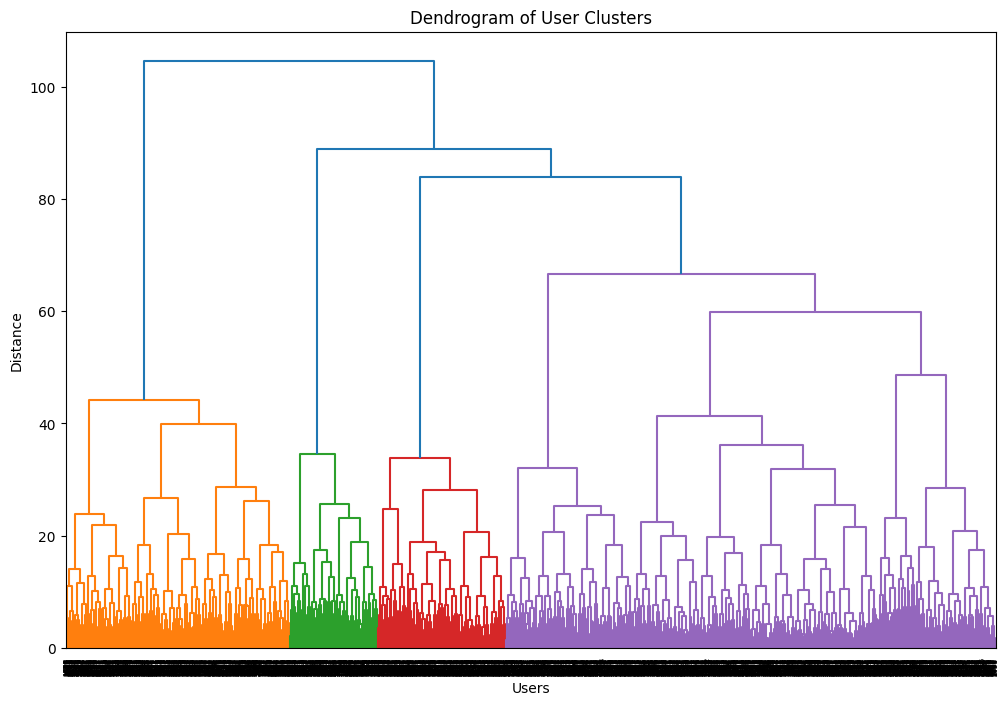

In [16]:
# Step 2: Build a distance matrix and plot a dendrogram
# Calculate the distance matrix using linkage
distance_matrix = linkage(scaled_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(distance_matrix)
plt.title('Dendrogram of User Clusters')
plt.xlabel('Users')
plt.ylabel('Distance')
plt.show()

<a id="13"></a> 
### K-means and Mean_features

> In this step, use the K-means algorithm to train a clustering model that identifies distinct customer clusters based on their characteristics. The goal is to group customers with similar attributes, providing insights into different customer segments and their behavior patterns.

> - 1. Start by defining the number of clusters, which is set to 5 for this analysis. This value can be adjusted based on prior analysis or domain knowledge.

> - 2. Initialize the K-means model with the specified number of clusters and a random state for reproducibility. The model is then fitted to the standardized features, ensuring all features are on the same scale and equally weighted during clustering.

> - 3. After training the model, use it to predict the clusters for the standardized features. These cluster assignments are added as a new column ('cluster') in the original DataFrame.

> - 4. In the next step, analyze the mean feature values for each cluster. This analysis provides insights into the characteristics and behaviors of customers within each cluster, helping to understand the unique attributes of each customer segment and potential reasons for churn.

In [17]:
# Step 3: Train the clustering model with K-means and predict customer clusters
# Define the number of clusters
num_clusters = 5

# Initialize the K-means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the standardized features
kmeans.fit(scaled_features)

# Predict the clusters for the standardized features
clusters = kmeans.predict(scaled_features)

# Add the predicted clusters to the original DataFrame
gym_df['cluster'] = clusters

# Step 4: Analyze the mean feature values for clusters

# Calculate the mean feature values for each cluster
mean_features = gym_df.groupby('cluster').mean()

# Display the mean feature values for each cluster
display(mean_features)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,29.104265,141.774331,2.887836,3.772512,1.770536,1.669581,0.246445
1,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,30.008999,159.774265,2.419573,4.780652,2.745505,2.733173,0.089989
2,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,29.905202,163.509804,10.812717,4.677457,2.006405,1.998179,0.021965
3,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


> The table 'mean_features' displays the average values of various features for each cluster identified by the K-means model. Here are the key insights from the analysis:

> - Cluster 0: This cluster comprises customers who are predominantly located near the gym and have partners. They tend to have shorter contract periods and lower additional charges. Their average age is slightly lower, and they show a moderate frequency of gym class attendance. The churn rate in this cluster is relatively low.

> - Cluster 1: Customers in this cluster have a moderate proportion of those located near the gym and having partners. They joined the gym through various channels and exhibit shorter contract periods with slightly higher additional charges. Their average age is slightly higher, and they demonstrate a higher frequency of gym class attendance. The churn rate is relatively low in this cluster.

> - Cluster 2: This cluster includes customers who are mostly located near the gym and have partners. They tend to have longer contract periods and higher additional charges. Their average age is slightly higher, and they exhibit a higher frequency of gym class attendance. The churn rate is relatively low in this cluster.

> - Cluster 3: Customers in this cluster have a lower proportion of those located near the gym, having partners, and joining through promotional friends. They have shorter contract periods, lower additional charges, and a lower frequency of gym class attendance. The churn rate is relatively higher in this cluster.

> - Cluster 4: This cluster comprises customers with a moderate proportion of those located near the gym, having partners, and joining through promotional friends. They have longer contract periods with slightly higher additional charges. Their average age is slightly lower, and they demonstrate a moderate frequency of gym class attendance. The churn rate is relatively low in this cluster.

- These findings indicate distinct characteristics among the clusters in terms of location, partnership status, contract duration, additional charges, age, gym class attendance, and churn rate.

<a id="14"></a> 
### Distributions of features for the clusters

> In this step, examine the distributions of selected features across different clusters to understand how they vary among customer segments.

> - Use box plots for visualization, as they offer insights into central tendency, spread, and potential outliers within each cluster. Box plots enable comparison of medians, quartiles, and overall value ranges for each feature across clusters, helping us identify significant differences or similarities in feature distributions.

> - The provided code generates subplots for each selected feature, displaying box plots for each cluster. Each subplot represents a feature, with the x-axis indicating clusters and the y-axis showing feature values. By analyzing these plots, we can observe how each feature is distributed within each cluster, identifying any distinct patterns or differences.

- This visualization allows us to compare feature distributions across clusters, aiding in the identification of unique patterns or characteristics associated with each cluster.

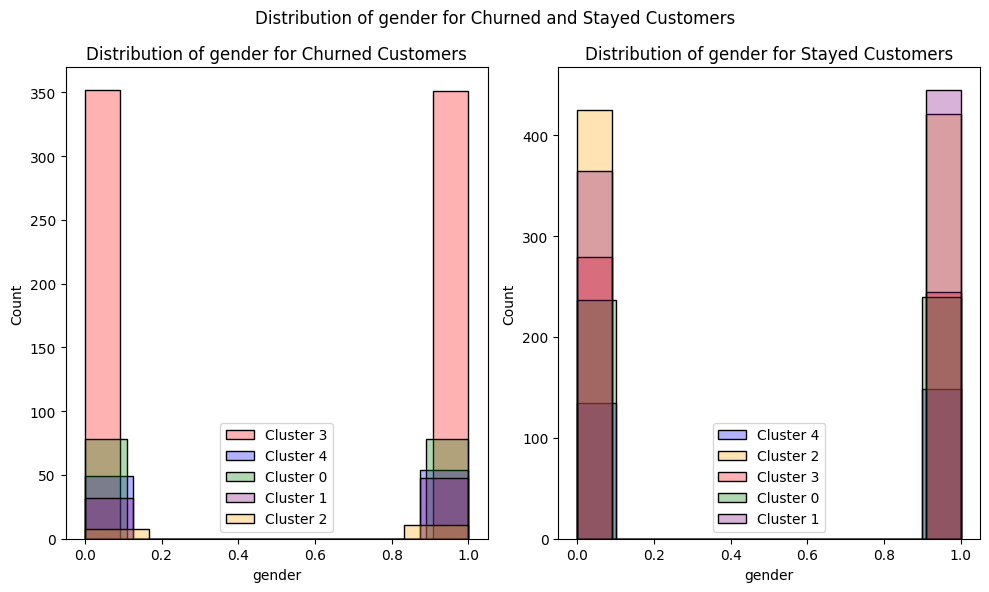

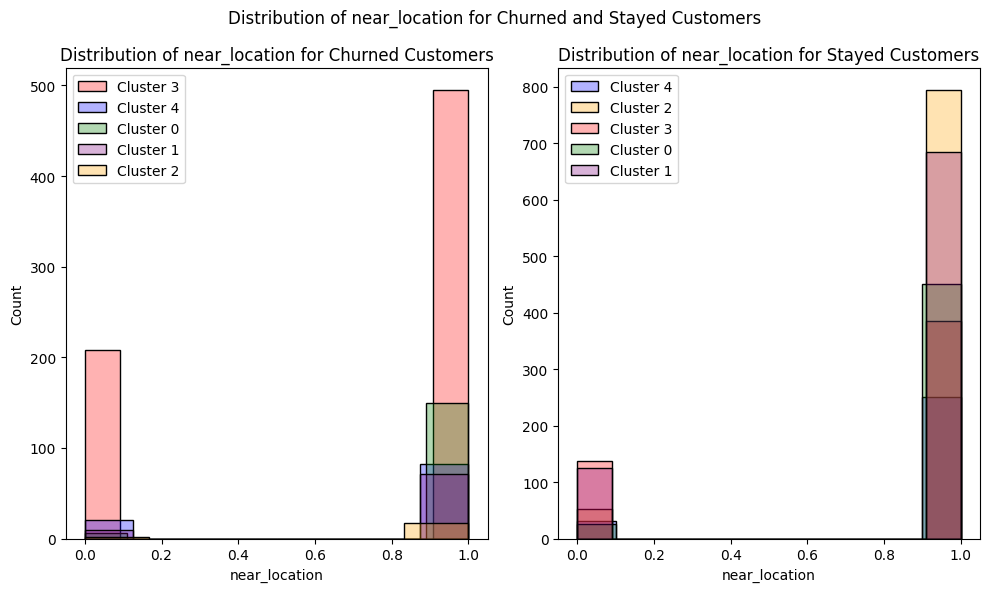

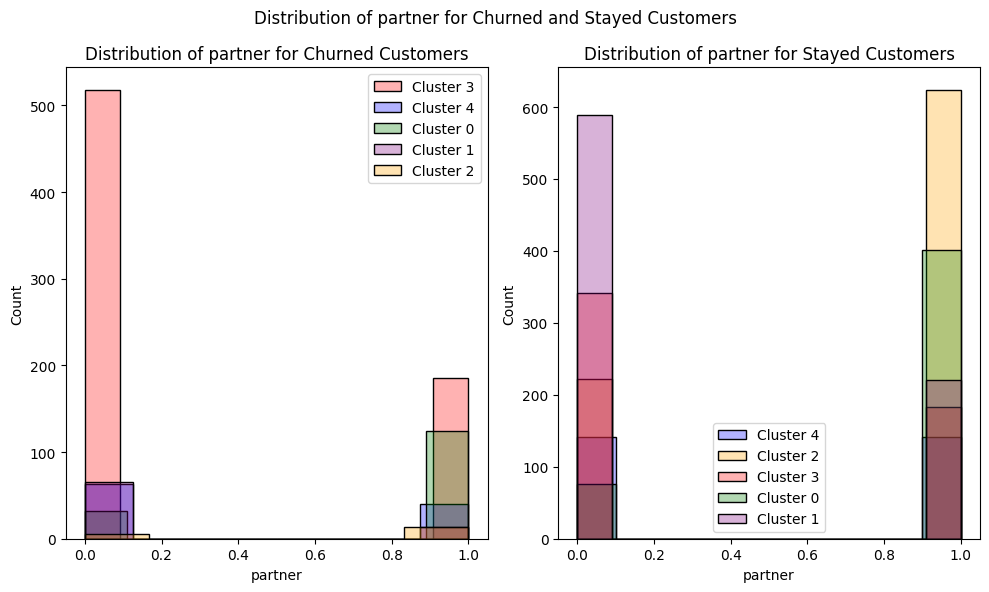

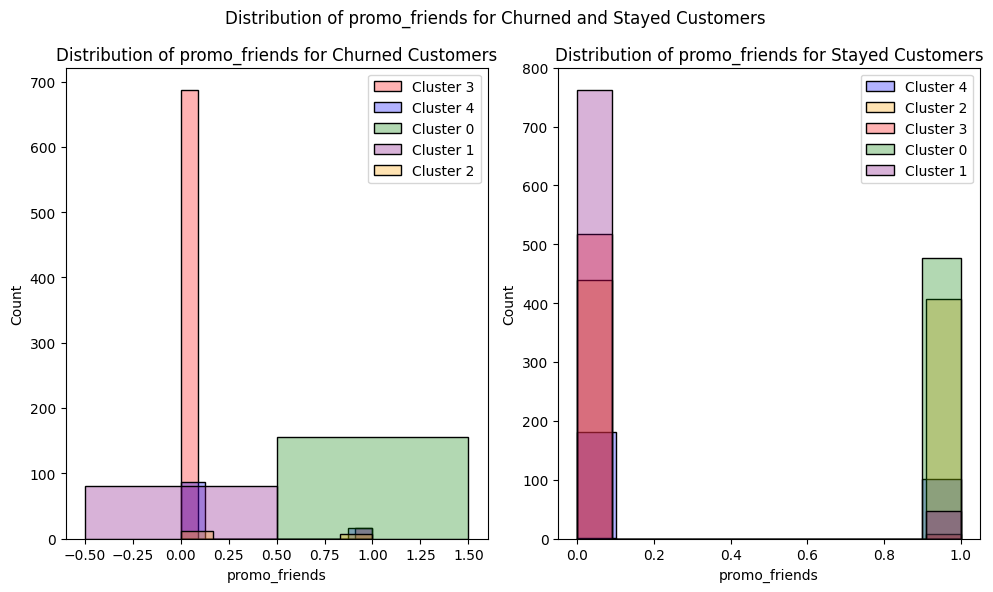

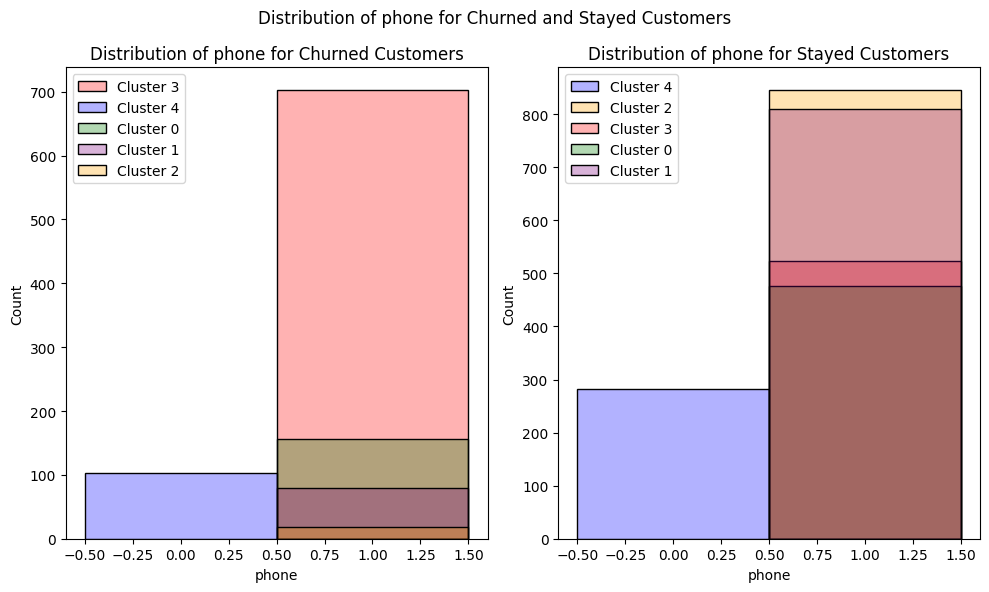

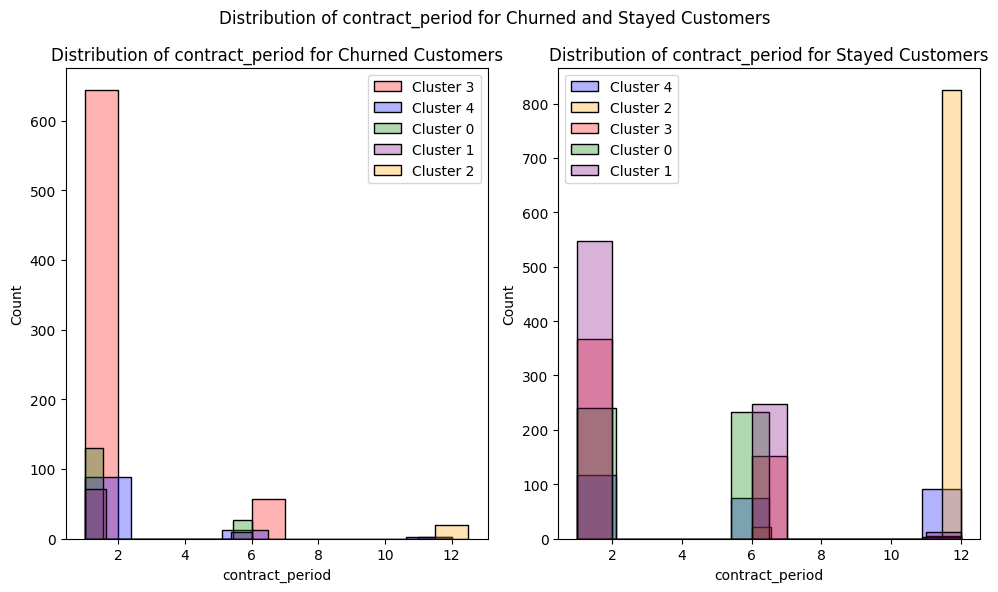

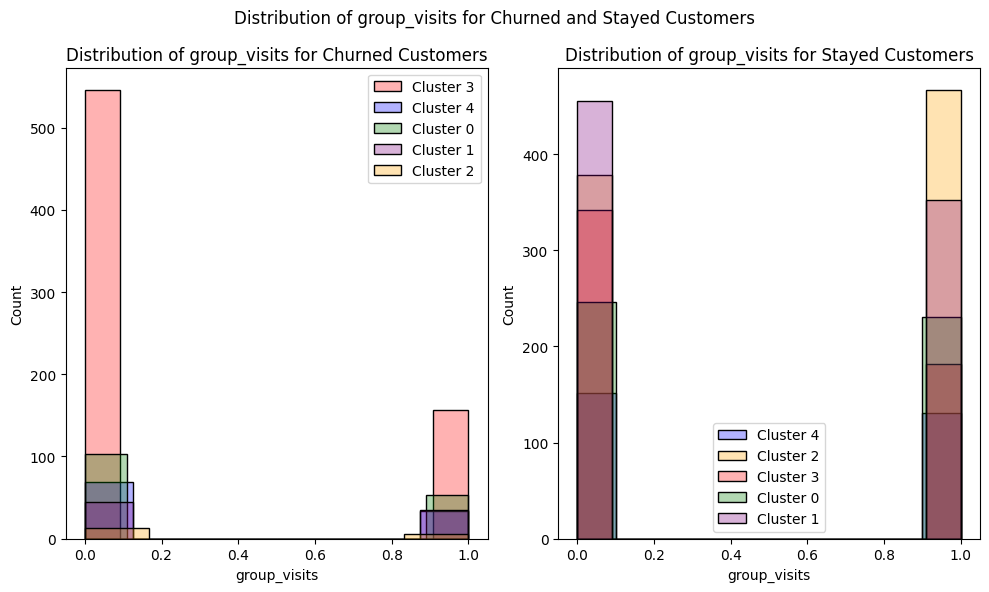

In [18]:
# Categorical features of interest
categorical_features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits']

# Define color labels for clusters
churned_color_labels = {0: 'green', 1: 'purple', 2: 'orange', 3: 'red', 4: 'blue'}
stayed_color_labels = {0: 'green', 1: 'purple', 2: 'orange', 3: 'red', 4: 'blue'}

# Plot histograms for categorical features for churned and stayed customers
for feature in categorical_features:
    plt.figure(figsize=(10, 6))

    # Plot for churned customers
    plt.subplot(1, 2, 1)
    for i, cluster in enumerate(gym_df[gym_df['churn'] == 1]['cluster'].unique()):
        color_label = churned_color_labels.get(cluster)
        sns.histplot(data=gym_df[(gym_df['churn'] == 1) & (gym_df['cluster'] == cluster)], x=feature,
                     color=color_label, label=f'Cluster {cluster}', alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature} for Churned Customers')
    plt.legend()

    # Plot for stayed customers
    plt.subplot(1, 2, 2)
    for i, cluster in enumerate(gym_df[gym_df['churn'] == 0]['cluster'].unique()):
        color_label = stayed_color_labels.get(cluster)
        sns.histplot(data=gym_df[(gym_df['churn'] == 0) & (gym_df['cluster'] == cluster)], x=feature,
                     color=color_label, label=f'Cluster {cluster}', alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature} for Stayed Customers')
    plt.legend()

    plt.suptitle(f'Distribution of {feature} for Churned and Stayed Customers')
    plt.tight_layout()
    plt.show()

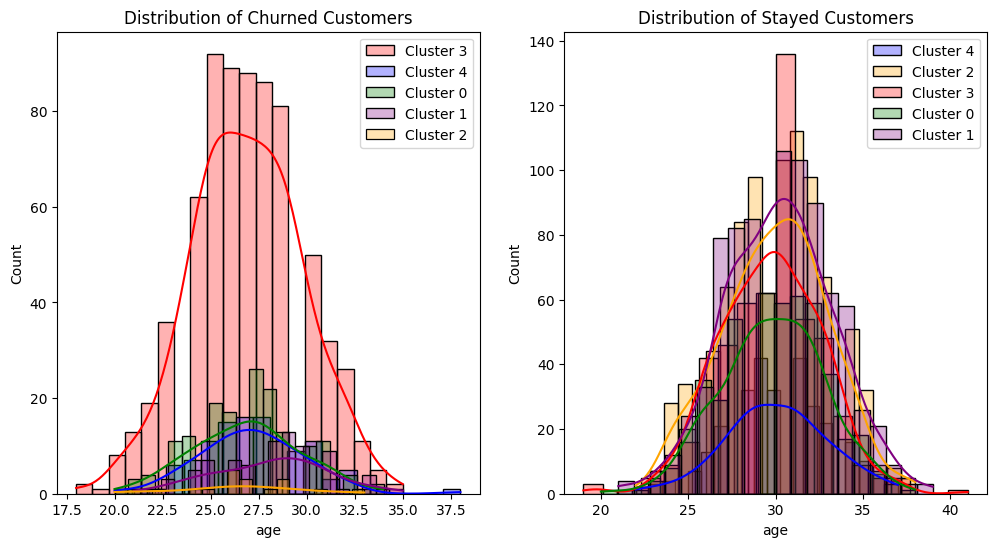

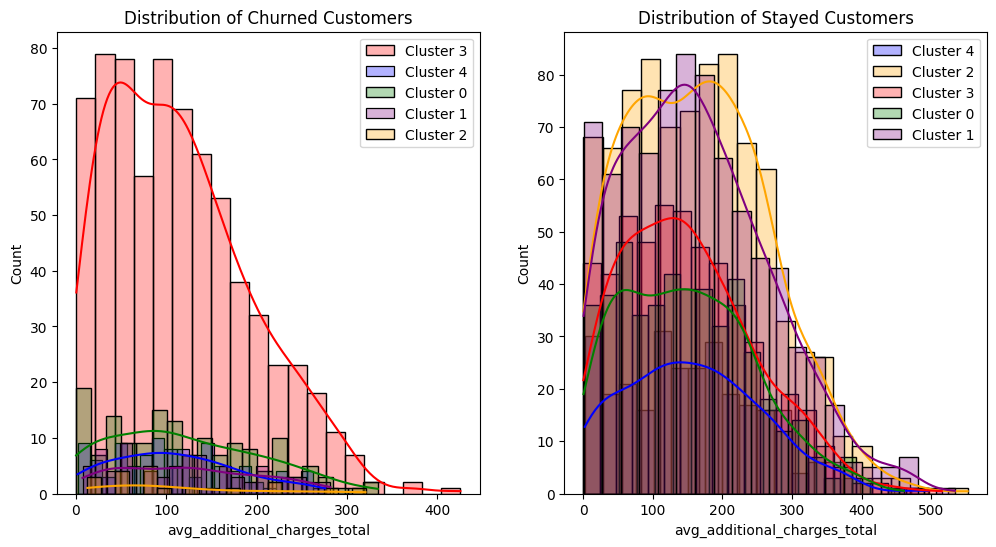

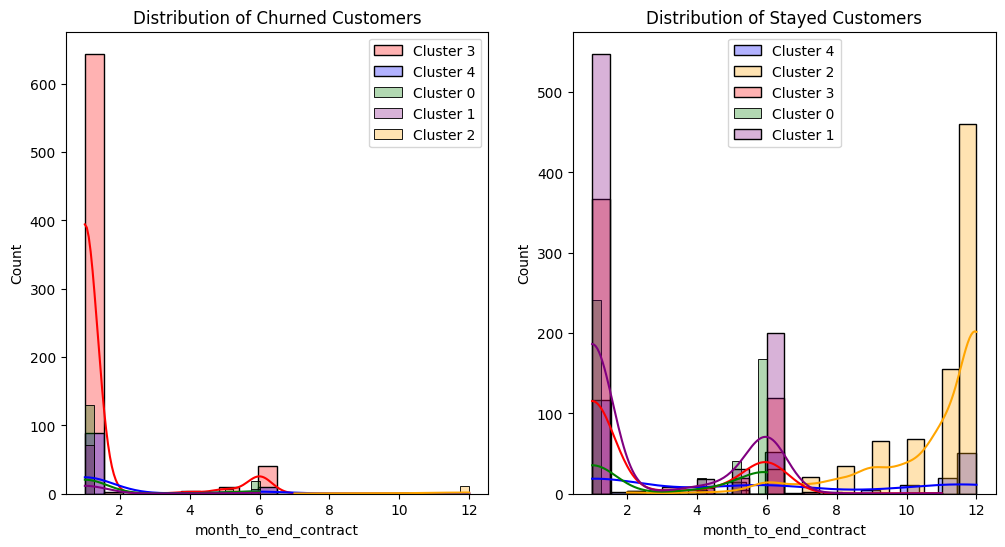

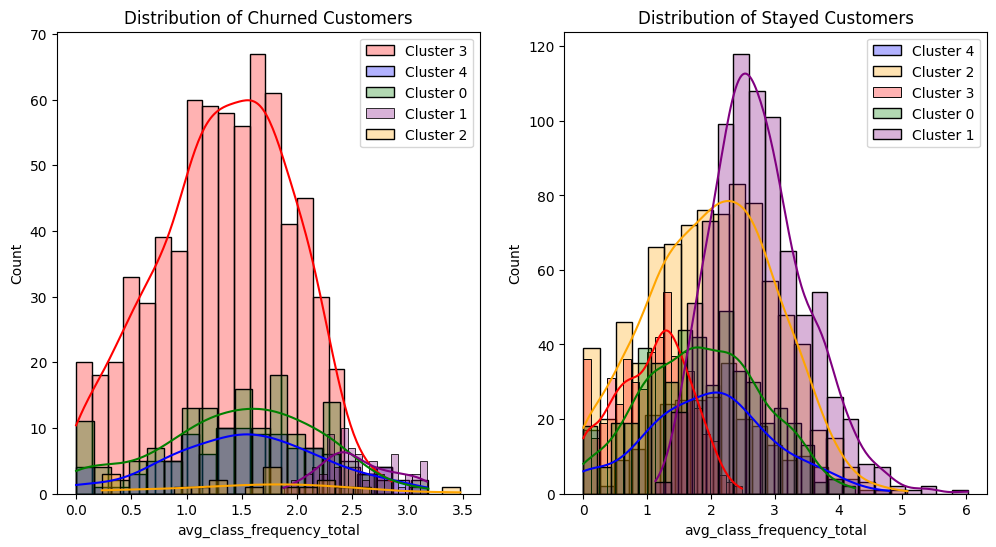

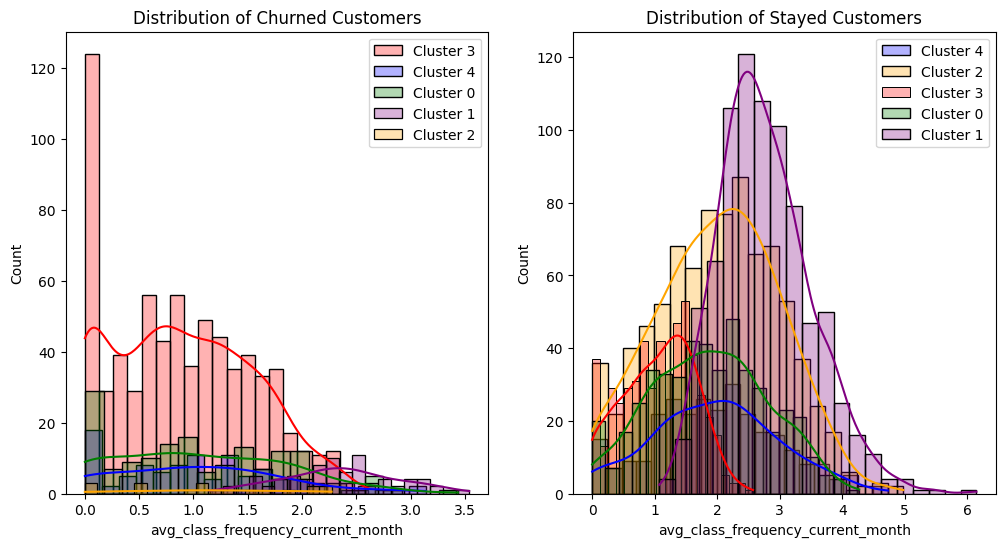

In [19]:
# Continuous features of interest
continuous_features = ['age', 'avg_additional_charges_total', 'month_to_end_contract',
                       'avg_class_frequency_total', 'avg_class_frequency_current_month']

# Define color dictionaries for clusters
churned_color_labels = {0: 'green', 1: 'purple', 2: 'orange', 3: 'red', 4: 'blue'}
stayed_color_labels = {0: 'green', 1: 'purple', 2: 'orange', 3: 'red', 4: 'blue'}

# Plot distributions for continuous features for churned and stayed customers
for feature in continuous_features:
    plt.figure(figsize=(12, 6))

    # Plot for churned customers
    plt.subplot(1, 2, 1)
    for cluster in gym_df[gym_df['churn'] == 1]['cluster'].unique():
        color_label = churned_color_labels.get(cluster)
        sns.histplot(data=gym_df[(gym_df['churn'] == 1) & (gym_df['cluster'] == cluster)], x=feature, bins=20, alpha=0.3,
                     label=f'Cluster {cluster}', kde=True, color=color_label)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of Churned Customers')
    plt.legend()

    # Plot for stayed customers
    plt.subplot(1, 2, 2)
    for cluster in gym_df[gym_df['churn'] == 0]['cluster'].unique():
        color_label = stayed_color_labels.get(cluster)
        sns.histplot(data=gym_df[(gym_df['churn'] == 0) & (gym_df['cluster'] == cluster)], x=feature, bins=20, alpha=0.3,
                     label=f'Cluster {cluster}', kde=True, color=color_label)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of Stayed Customers')
    plt.legend()

- Based on the analysis of the histograms for both continuous and categorical features, several noteworthy findings emerge:

> Continuous Features:

> - Age: Clusters exhibit varying age distributions, indicating distinct age group preferences among members.
> - Average Additional Charges: Different clusters show varying spending patterns on additional services.
> - Month to End Contract: The remaining contract months differ among clusters, indicating diverse contract duration preferences.
> - Average Class Frequency: Clusters differ in their average class attendance frequencies.
> - Lifetime: Customer lifetimes vary across clusters, suggesting differences in loyalty and engagement levels.
> - Average Class Frequency (Current Month): Variations exist in class attendance frequencies for the current month across clusters.

>  Categorical Features:

> - Gender: The gender distribution is fairly balanced across clusters, suggesting gender may not be a significant factor in differentiation.
> - Near Location: Most clusters consist of customers living near the fitness center, indicating proximity as an important retention factor.
> - Partner: Some clusters show a higher proportion of customers with partners, indicating potential preferences for joint memberships.
> - Promo Friends: Clusters differ in the proportion of customers joining through friend referrals, implying varied responses to word-of-mouth marketing.
> - Phone: Most clusters include customers with phone contacts, highlighting the importance of phone communication in engagement.
> - Contract Period: Clusters exhibit varying contract duration preferences, indicating diverse membership commitment levels.
> - Group Visits: Some clusters contain more customers participating in group visits, indicating a preference for social activities.

- These findings provide valuable insights into customer behavior and preferences within each cluster, which can inform targeted retention strategies. Further analysis and interpretation in the context of business goals are crucial for deriving actionable insights

<a id="15"></a> 
## Churn Rate

- To assess the churn rate for each customer cluster, computed the average churn rate within each cluster. 
- The churn rate indicates the percentage of customers within a cluster who have ceased their gym membership. 
- By aggregating the data by cluster and calculating the mean of the churn column, we derived the churn rate for each cluster.

In [20]:
# Calculate the churn rate for each cluster
churn_rate = gym_df.groupby('cluster')['churn'].mean()

# Print the churn rate for each cluster
print(churn_rate)

cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: churn, dtype: float64


- The churn rates differ among the clusters, suggesting varying levels of customer loyalty and retention. 
- Cluster 2 exhibits the lowest churn rate, indicating that customers in this group are more inclined to stay with the gym.
- Conversely, Cluster 3 shows the highest churn rate, indicating a higher likelihood of customers in this cluster leaving.

- Analyzing the churn rate per cluster helps identify which customer groups are more likely to leave and which are more loyal. This insight is valuable for devising targeted retention strategies and enhancing overall customer satisfaction.

<a id="16"></a> 
# Stage 3: Overall conclusion
- Recommendations on working with customers

- Based on the clustering behavior and customer churn analysis, here are four key strategies and their implementation examples for customer interaction and retention:

> Targeted Promotions:
> - Strategy: Identify clusters with high churn rates and create targeted promotional campaigns to engage and retain customers.
> - Example: Offer personalized discounts or incentives based on individual interests and preferences.

> Enhanced Customer Experience:
> - Strategy: Focus on improving overall customer experience to boost satisfaction and loyalty.
> - Example: Introduce new fitness classes or amenities tailored to different cluster preferences.

> Regular Engagement:
> - Strategy: Implement strategies to keep customers engaged and motivated.
> - Example: Send personalized workout reminders or offer rewards for achieving fitness goals.

> Proactive Customer Support:
> - Strategy: Identify potential churn signals and proactively address customer concerns.
> - Example: Monitor contract expiration dates and offer personalized solutions to prevent churn.

- These strategies, when tailored to the behavior and needs of different customer clusters, can help maximize customer satisfaction, loyalty, and retention rates.